# **Homework Five**


•	(Ungraded, but as always, completion still counts!) DataCamp Data Ingestion & inspection, and Exploratory data analysis

•	(Ungraded) Reading Vanderplas Chapters 2 & 3 (https://jakevdp.github.io/PythonDataScienceHandbook/)

•	(Graded) Part I: Gaddis 11.3 (Follow prompts below), Part II: Data exercise below (Enter your code whereever it says # Your code here)

# ** Part I (Gaddis 11.3)**

Below is a class named <span style="color:green"> Person </span> with data attributes for a person’s ** name, address, and telephone number**. Next, write a class named <span style="color:green"> Customer </span> that is a subclass of the Person class. The <span style="color:green"> Customer </span> class should have a data attribute for a **customer number**, and a Boolean data attribute, **on_list**, indicating whether the customer wishes to be on a mailing list. The <span style="color:green"> Customer </span> class should also have a method that asks the user if they want to be on the list (y/n), and then assigns that to the on_list attribute. Demonstrate an instance of the <span style="color:green"> Customer </span> class in a simple program. (This is a short problem, so don't overthink it.)


In [1]:
class Person:
    def __init__(self, name, address, phone_number):
        self.name = name
        self.address = address
        self.phone_number = phone_number

In [2]:
class Customer(Person):
    def __init__(self, name, address, phone_number, cust_number, on_list):
        Person.__init__(self, name, address, phone_number)
        self.cust_number = cust_number
        self.on_list = on_list

    def set_on_list(self):
        mail = input("Would you like to be on the mailing list? (y/n):")
        
        if mail == "y":
            self.on_list = "y"
            return self.on_list
        else:
            self.on_list = "n"
            return self.on_list

1. Create an instance of the Customer class called Jane, instantiating Jane with 'n' for the on-list attribute. 
2. Then call the set_on_list() method for Jane, and respond 'y'
3. Call the Jane.on_list attribute to show that on_list changed from 'n' to 'y'

In [3]:
# Your code here after Jane
Jane = Customer("Jane", "1 Grand Ave", 1212121212, 1234, 'n')

Jane.set_on_list()

Jane.on_list

Would you like to be on the mailing list? (y/n):y


'y'

# Part II (Data)

a) Use the bmore.csv dataset for this homework. Make sure your output does not display errors. 
Import the data into a DataFrame and describe the data.

In [4]:
import time                     
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats as st
import statsmodels.formula.api as sm
from patsy import dmatrices

# Your code here to load the csv file
df = pd.read_csv("bmore.csv")

b) Report summary statistics (e.g., mean, median, and standard deviations) of all numerical
variables using numpy's methods. That is, print a table that says something like this:

** variable 1 name **

mean(Variable 1)

median(variable 1)

stand.Dev.(Variable 1)



** variable 2 name**

mean(Variable 2)

median(variable 2)

mode(variable 2)

In [5]:
for x in df.columns:
    if (df[x].dtypes) == np.dtype('O'):
        # This if statement says, data type is a string/word, don't attempt to calculate stats
        pass
    else: 
        print(x)
        print("Mean: " + str(df[x].mean()))
        print("Median: " + str(df[x].median()))
        print("Standard Deviation: " + str(df[x].std()))
        print("\n")

Population
Mean: 11214.581818181818
Median: 9874.0
Standard Deviation: 4340.770727309922


Median_Income
Mean: 40319.454545454544
Median: 36632.0
Standard Deviation: 16405.020242030005


Unemployed
Mean: 0.11672727272727272
Median: 0.11
Standard Deviation: 0.05504390656404802


Families_in_Poverty
Mean: 0.15836363636363637
Median: 0.13
Standard Deviation: 0.10215753333044812


Bachelors_degree
Mean: 0.2587272727272728
Median: 0.18
Standard Deviation: 0.20806030594299071


Juvenile_Arrest_Rate
Mean: 162.87454545454545
Median: 129.4
Standard Deviation: 132.82893094361222


Homicide_Incidence_Rate
Mean: 21.463636363636365
Median: 19.0
Standard Deviation: 15.525777414022281


Unnamed: 8
Mean: 71.49818181818182
Median: 71.9
Standard Deviation: 4.782897421449444




Make a scatterplot of Median Income and Bachelors degree. The latter variable measures the
percentage of the population in the county that has a bachelors degree. Label the x-axis "Percent Bachelors Degree", and make the title "Scatterpolt of Median Income and Bachelors Degree."

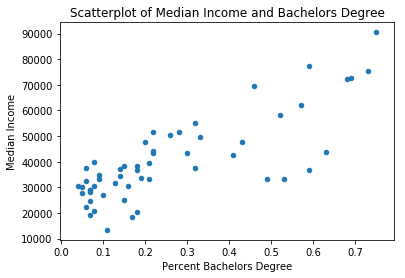

In [6]:
# Show graphs within the Python notebook use matplotlib inline command
%matplotlib inline

# Your code here
df.plot(kind = "scatter", x = "Bachelors_degree", y = "Median_Income")
plt.xlabel("Percent Bachelors Degree")
plt.ylabel("Median Income")
plt.title("Scatterplot of Median Income and Bachelors Degree")
plt.show()

Run a regression model of the following form:
Report a table with all coefficient estimates including p-values.

$$\textrm{Juvenile_Arrest_Rate} = 
\beta_0 + \beta_1\textrm{Population} + \beta_2\textrm{Median_Income} + \beta_3\textrm{Unemployment} + \beta4\textrm{Education} + \beta_5\textrm{Poverty} + \epsilon $$

In [7]:
# Create a fitted model
lm = sm.ols("Juvenile_Arrest_Rate ~ Population + Median_Income + Unemployed + Bachelors_degree + Families_in_Poverty"
            , df).fit()

# Your code here: print model summary
lm.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,265.4481,117.846,2.252,0.029,28.628,502.268
Population,-0.0039,0.004,-1.097,0.278,-0.011,0.003
Median_Income,-0.0054,0.002,-2.744,0.008,-0.009,-0.001
Unemployed,-327.2254,460.436,-0.711,0.481,-1252.506,598.055
Bachelors_degree,434.1787,124.732,3.481,0.001,183.520,684.838
Families_in_Poverty,523.8737,265.980,1.970,0.055,-10.633,1058.380


Interpret the coefficient on median income. A \$1 dollar increase in median income will decrease the incarceration rate by how much? What about a \$1,000 increase?

# Your response here


In [8]:
# Our coefficient of -0.0054 tells us that, after adjusting for the 4 other variables, each $1 increase in median income is associated 
# with a 0.0054 percentage point decrease in juvenile arrest rate. Subsequently, after adjusting for the 4 other variables, each $1,000 
# increase in median income is associated with a 5.4 percentage point decrease in juvenile arrest rate.